In [1]:
import numpy as np
import pandas as pd


DATA_PATH = "../data/train_samples.win500.npy"

In [2]:
data = np.load(DATA_PATH, allow_pickle=True)

In [3]:
data = pd.DataFrame(data.tolist())

In [4]:
data.person.nunique()

21

In [5]:
data.groupby('person').time.agg(['min', 'max'])

,min,max
person,,
SC4022,0,9995
SC4042,0,9995
SC4061,0,9995
SC4062,0,9995
SC4082,0,9995
SC4102,0,9995
SC4141,0,9995
SC4181,0,9995
SC4192,0,9995


In [6]:
data.groupby('person').label.value_counts()

person  label        
SC4022  Sleep stage W    11196
        Sleep stage 2     2016
        Sleep stage R     1008
        Sleep stage 1      792
        Sleep stage 3      288
                         ...  
SC4752  Sleep stage W    10620
        Sleep stage 2     2340
        Sleep stage 1      540
        Sleep stage R      408
        Sleep stage 3       36
Name: label, Length: 111, dtype: int64

In [7]:
data.value[0].shape

(500, 2)

In [8]:
data.value[0][:, 0] ** 2 + data.value[0][:, 1] ** 2

array([5.24891438e+03, 5.31579091e+03, 5.69131967e+03, 5.16902075e+03,
       4.58313700e+03, 3.71342270e+03, 2.68071702e+03, 1.55444608e+03,
       9.53019153e+02, 4.88369874e+02, 2.39930015e+02, 7.60634845e+01,
       6.90509138e+00, 6.92161002e+01, 1.54821268e+02, 4.96639747e+02,
       7.72953912e+02, 9.21177088e+02, 1.12392043e+03, 1.28649862e+03,
       1.24198216e+03, 1.51234102e+03, 1.45570330e+03, 1.62960776e+03,
       1.73738248e+03, 1.50346104e+03, 1.79112046e+03, 1.83886093e+03,
       1.71263440e+03, 1.86279782e+03, 1.76966057e+03, 1.78586062e+03,
       1.68379097e+03, 1.58378498e+03, 1.60120149e+03, 1.64325841e+03,
       1.47559779e+03, 1.24488061e+03, 1.29447583e+03, 1.44535272e+03,
       1.30681829e+03, 1.09773455e+03, 1.16331755e+03, 8.79914459e+02,
       8.98390741e+02, 1.22736289e+03, 8.07770299e+02, 8.14712934e+02,
       9.22447190e+02, 6.78840853e+02, 7.78406604e+02, 7.36049665e+02,
       7.46174583e+02, 6.14352037e+02, 6.52342729e+02, 8.12214577e+02,
      

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 20, 10

In [26]:
v0 = pd.DataFrame(data[data.person == "SC4022"].value.map(lambda x: x[1]).tolist(), columns=['x', 'y'])

In [33]:
label = data[data.person == "SC4022"].label
groups = dict(enumerate(label.value_counts().index.tolist()))
inv_groups = {v: k for k, v in groups.items()}
v0['label'] = 50 * (label.map(lambda x: inv_groups[x]) - 2)

In [34]:
groups

{0: 'Sleep stage W',
 1: 'Sleep stage 2',
 2: 'Sleep stage R',
 3: 'Sleep stage 1',
 4: 'Sleep stage 3',
 5: 'Sleep stage 4'}

<AxesSubplot:>

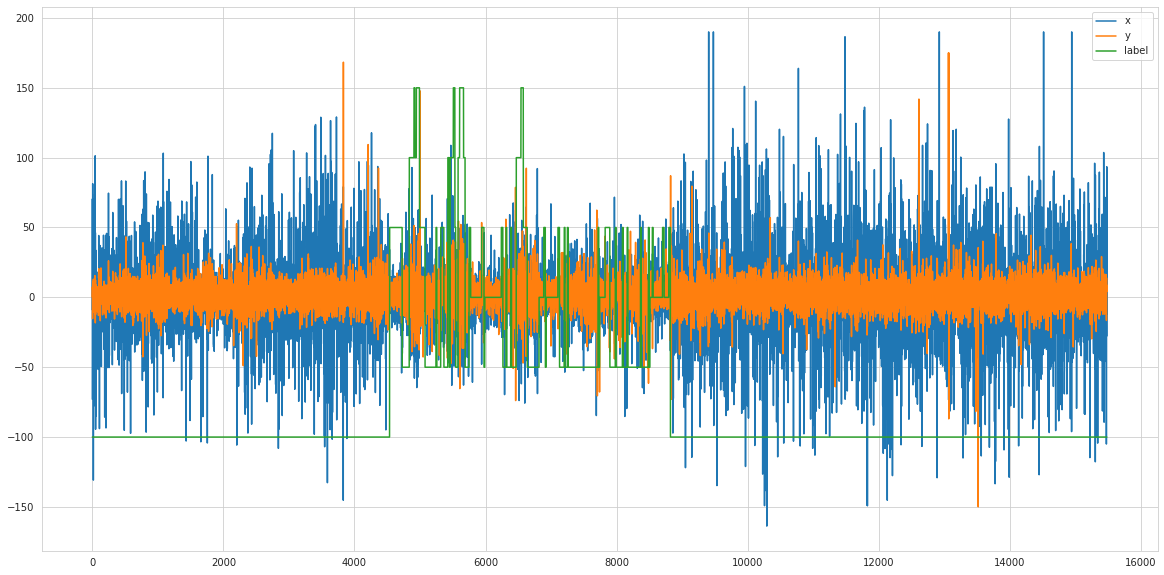

In [35]:
v0.plot()

<AxesSubplot:>

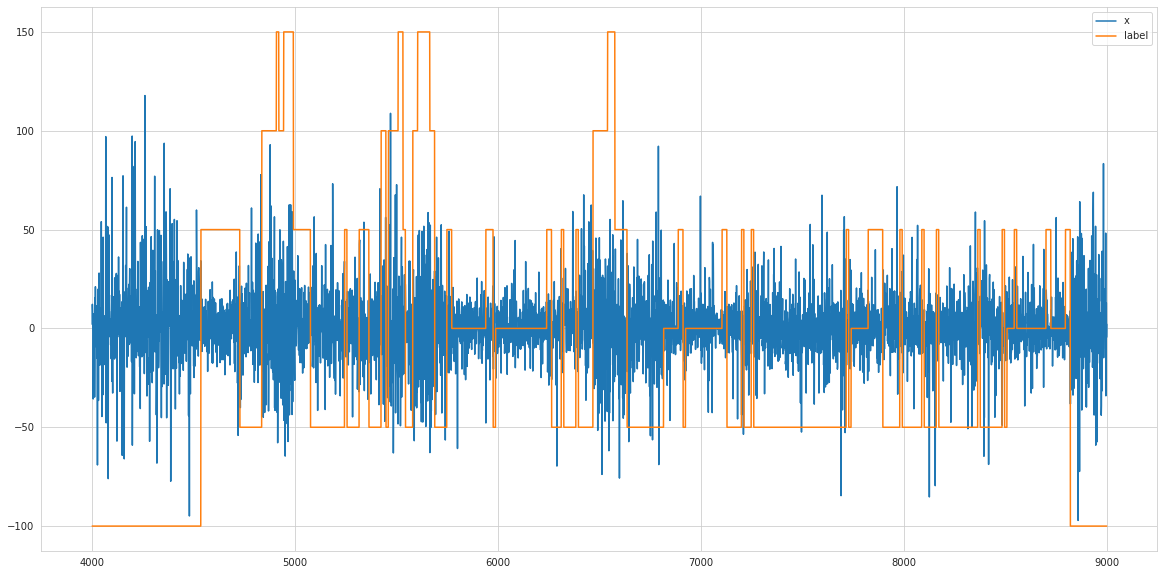

In [36]:
v0.iloc[4000:9000][['x', 'label']].plot()

<AxesSubplot:>

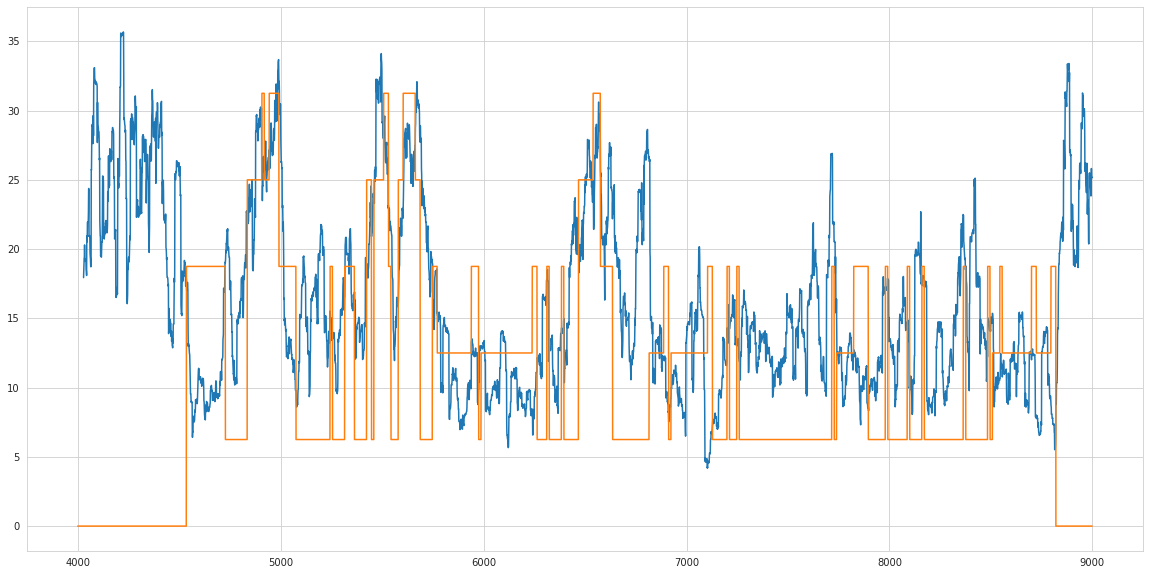

In [47]:
v0.iloc[4000:9000].x.rolling(30).std().plot()
((100 + v0.iloc[4000:9000].label) / 8).plot()

<AxesSubplot:>

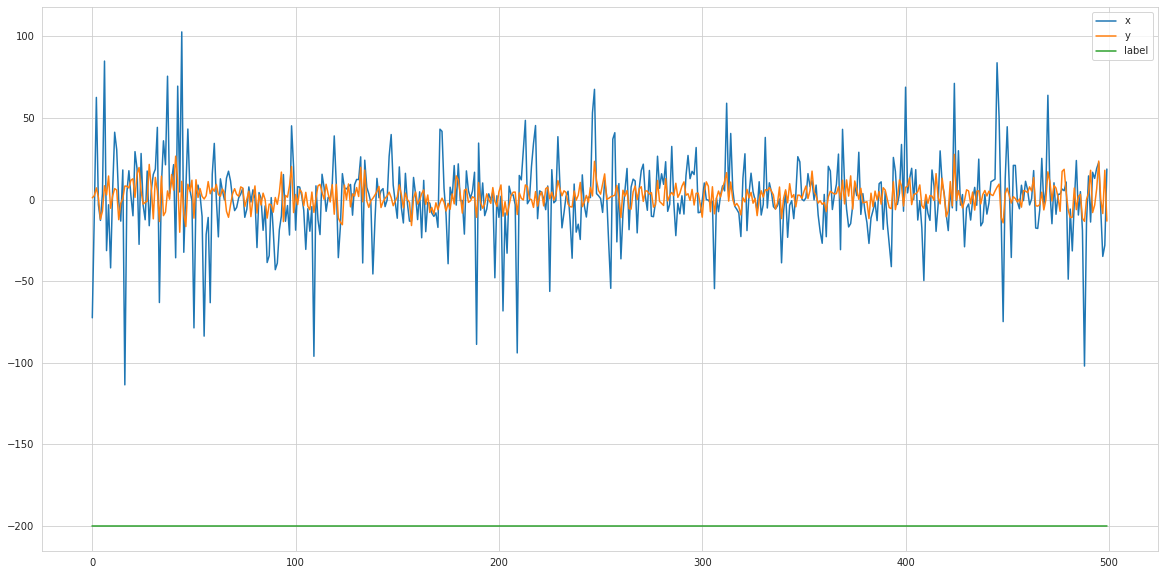

In [21]:
v0.iloc[:500].plot()

<AxesSubplot:xlabel='x', ylabel='y'>

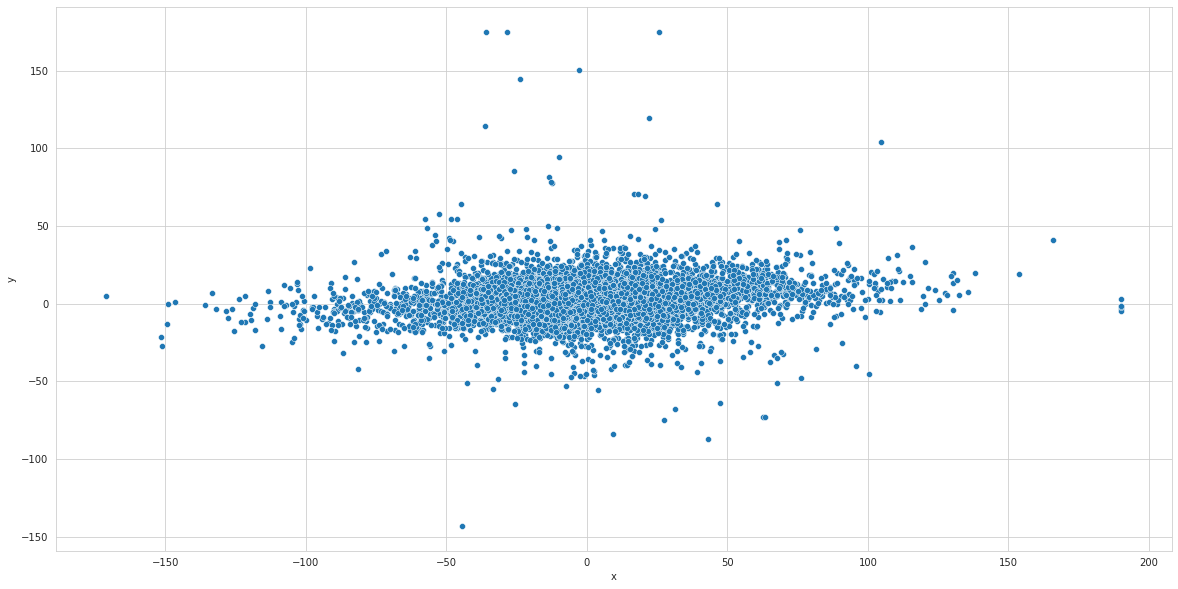

In [22]:
sns.scatterplot(data=v0, x='x', y='y')

In [ ]:
data.label.value_counts()

In [ ]:
test_data.label.value_counts()

In [ ]:
test_data = np.load('../data/two_stage_test.npy', allow_pickle=True)
test_data = pd.DataFrame(test_data.tolist())
test_data

In [ ]:
test_data.person.unique()

In [ ]:
test_data.label.value_counts(dropna=False)

In [ ]:
test_data[test_data.person == "ST7062"].label.value_counts()

In [ ]:
test_data.groupby('person').label.nunique()

In [ ]:
v1 = pd.DataFrame(test_data[test_data.person == "ST7211"].value.map(lambda x: x[450]).tolist(), columns=['x', 'y'])
label = test_data[test_data.person == "ST7211"].label.reset_index(drop=True)
groups = dict(enumerate(label.value_counts().index.tolist()))
inv_groups = {v: k for k, v in groups.items()}
v1['label'] = 10 * (label.map(lambda x: inv_groups[x]) - 0.5)

In [ ]:
groups

In [ ]:
v1.reset_index(drop=True).plot()
v1.label.plot()

In [ ]:
v1[v1.label == -5].reset_index(drop=True).rolling(10).std().shift(-10).plot()
v1[v1.label == 5].reset_index(drop=True).rolling(10).std().shift(-10).plot()

In [120]:
test_data[test_data.person == "ST7062"].label.value_counts()

Sleep stage W    180
Name: label, dtype: int64

In [121]:
test_data.groupby('person').label.nunique()

person
ST7011    2
ST7012    1
ST7022    2
ST7052    2
ST7062    1
ST7091    1
ST7092    1
ST7102    2
ST7111    2
ST7112    2
ST7132    2
ST7142    2
ST7152    2
ST7161    2
ST7162    2
ST7172    1
ST7181    1
ST7191    2
ST7202    1
ST7211    2
ST7242    2
Name: label, dtype: int64

In [158]:
v1 = pd.DataFrame(test_data[test_data.person == "ST7211"].value.map(lambda x: x[450]).tolist(), columns=['x', 'y'])
label = test_data[test_data.person == "ST7211"].label.reset_index(drop=True)
groups = dict(enumerate(label.value_counts().index.tolist()))
inv_groups = {v: k for k, v in groups.items()}
v1['label'] = 10 * (label.map(lambda x: inv_groups[x]) - 0.5)

In [159]:
groups

{0: 'Sleep stage W', 1: 'Sleep stage 4'}

<AxesSubplot:>

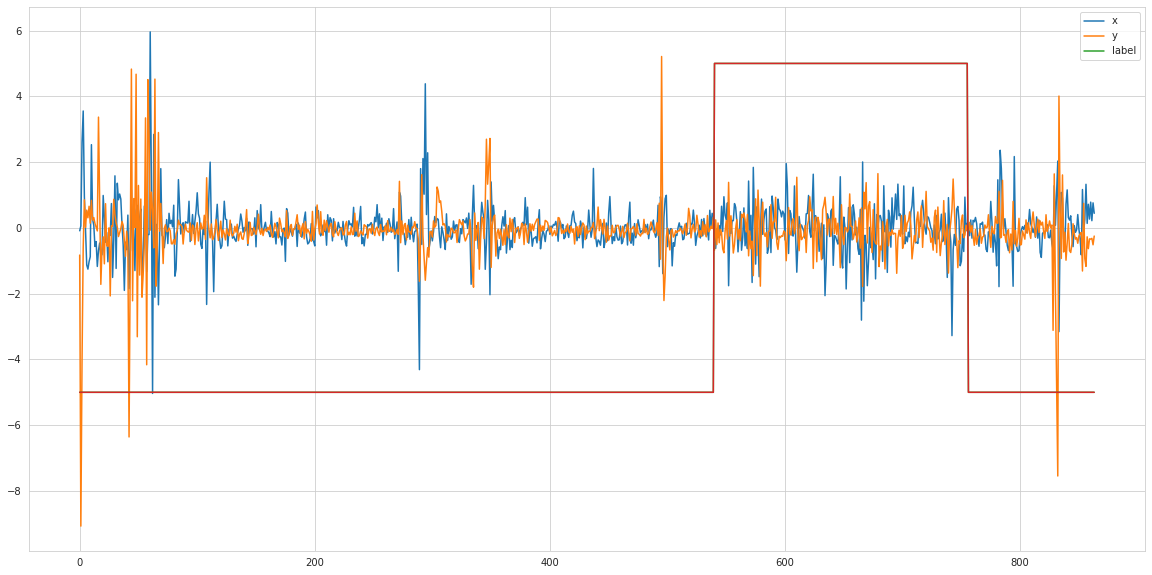

In [165]:
v1.reset_index(drop=True).plot()
v1.label.plot()

<AxesSubplot:>

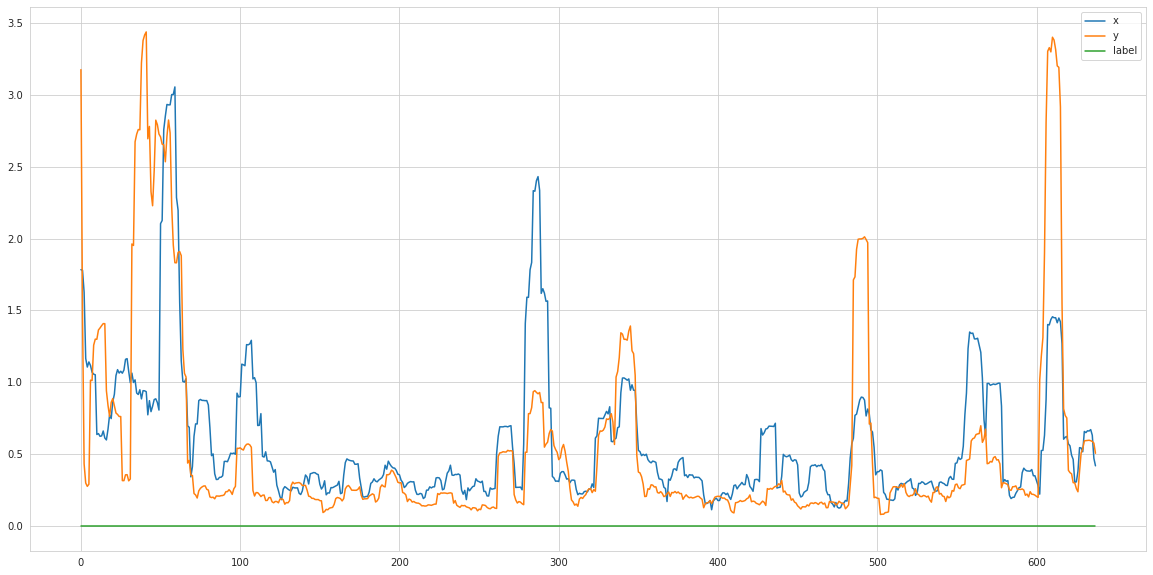

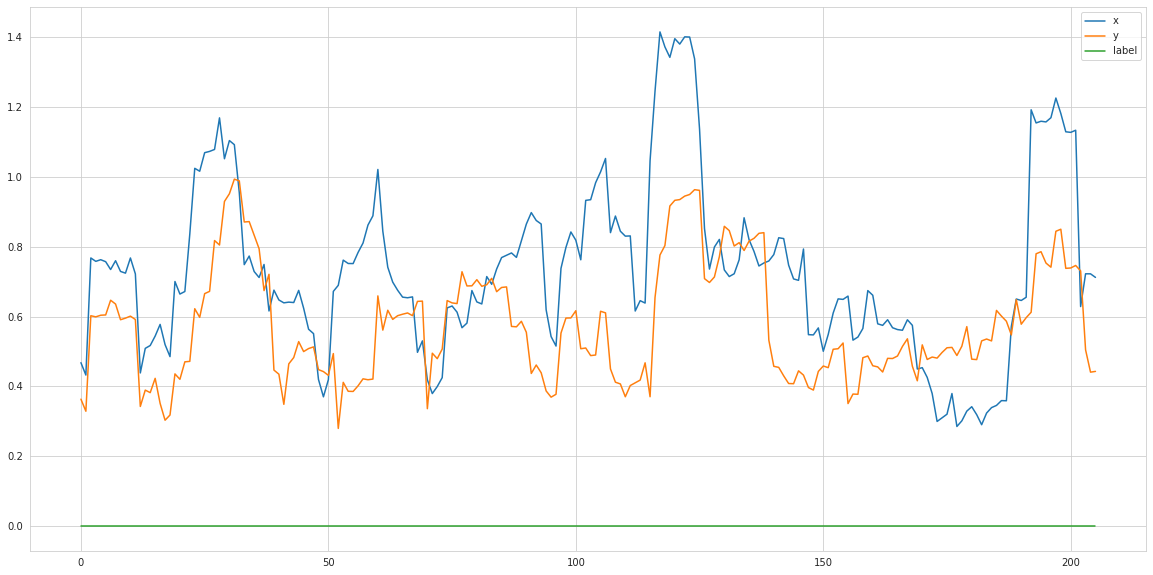

In [160]:
v1[v1.label == -5].reset_index(drop=True).rolling(10).std().shift(-10).plot()
v1[v1.label == 5].reset_index(drop=True).rolling(10).std().shift(-10).plot()

<AxesSubplot:>

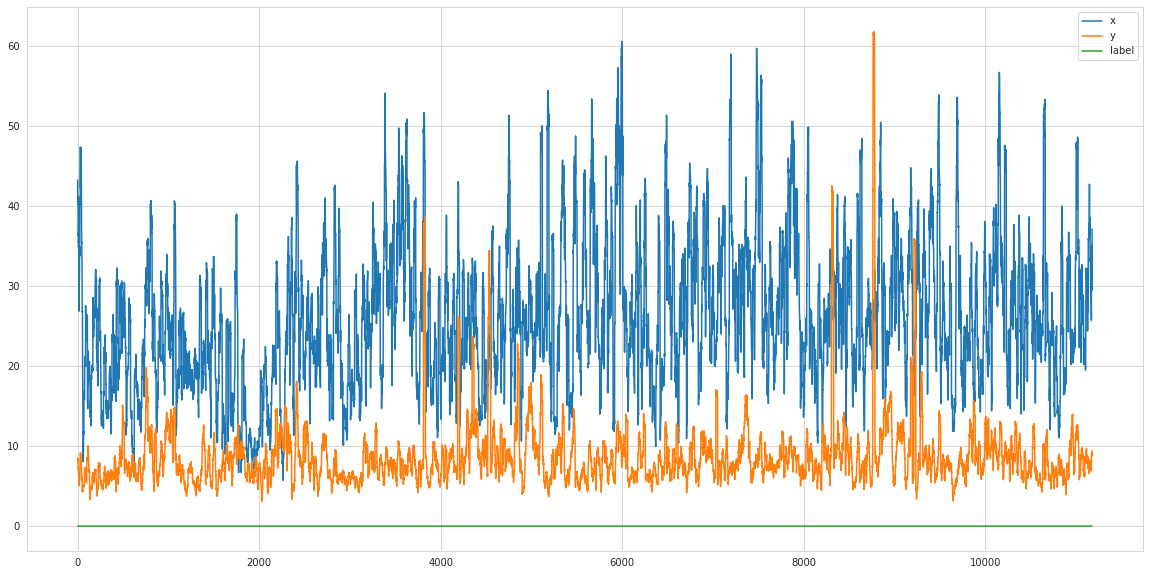

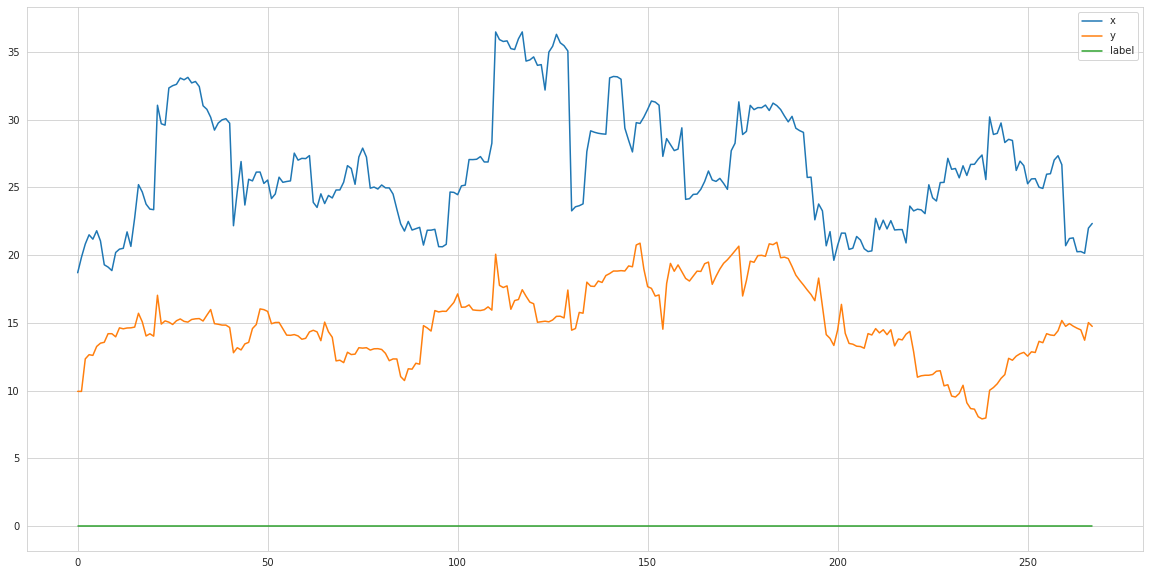

In [157]:
v0[v0.label == -100].reset_index(drop=True).rolling(20).std().shift(-20).plot()
v0[v0.label == 100].reset_index(drop=True).rolling(20).std().shift(-20).plot()